# **📚 Step 1: Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# **📂 Step 2: Loading the Dataset**

In [2]:
# Load dataset
data = pd.read_csv("/content/adult 3.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


# **🧹 Step 4: Cleaning Missing Values**

In [4]:
print(data.workclass.value_counts())
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

print(data['occupation'].value_counts())
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       6

# **📉 Step 5: Detecting and Removing Outliers**

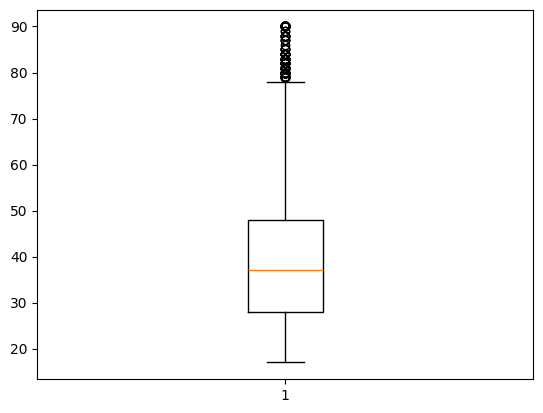

In [5]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

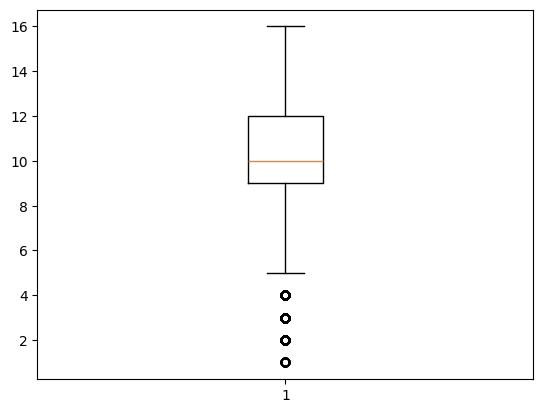

In [6]:
plt.boxplot(data['educational-num'])
plt.show()
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

# **✂️ Step 6: Dropping Redundant Columns**

In [7]:
# Drop redundant column
data.drop(columns=['education'], inplace=True)

# **🔐 Step 7: Encoding Categorical Variables**

In [8]:
# Encode categorical variables
le=LabelEncoder()                       #create object
data['workclass']=le.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=le.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=le.fit_transform(data['occupation'])
data['relationship']=le.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=le.fit_transform(data['race'])
data['gender']=le.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=le.fit_transform(data['native-country'])

In [9]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K


# **🧮 Step 8: Splitting Features and Target Variable**

In [10]:
# Define X and y
X = data.drop('income', axis=1)
y = LabelEncoder().fit_transform(data['income'])  # Encode target (<=50K=0, >50K=1)

# **🎯 Step 9: Splitting Dataset into Train and Test Sets**

In [11]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **⚙️ Step 10: Defining Machine Learning Models**

In [12]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}


# **🏁 Step 11: Training and Evaluating Models**

In [13]:
# Evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {
        "accuracy": acc,
        "auc": auc,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Accuracy: {acc:.4f}")
    if auc is not None:
        print(f"{name} ROC AUC Score: {auc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8175
Logistic Regression ROC AUC Score: 0.8522
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7007
           1       0.73      0.46      0.56      2397

    accuracy                           0.82      9404
   macro avg       0.78      0.70      0.72      9404
weighted avg       0.81      0.82      0.80      9404


Random Forest Accuracy: 0.8524
Random Forest ROC AUC Score: 0.9078
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7007
           1       0.75      0.62      0.68      2397

    accuracy                           0.85      9404
   macro avg       0.82      0.78      0.79      9404
weighted avg       0.85      0.85      0.85      9404


Gradient Boosting Accuracy: 0.8611
Gradient Boosting ROC AUC Score: 0.9211
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7007
           1 

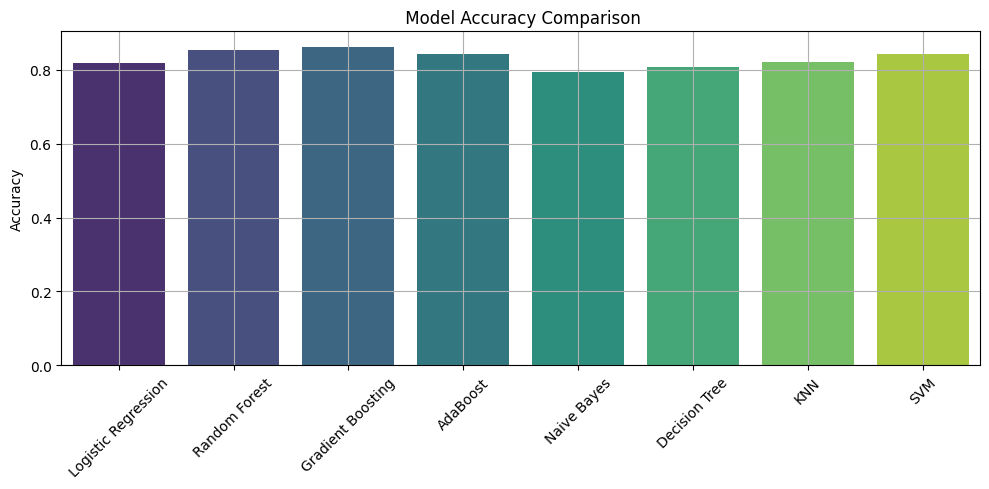

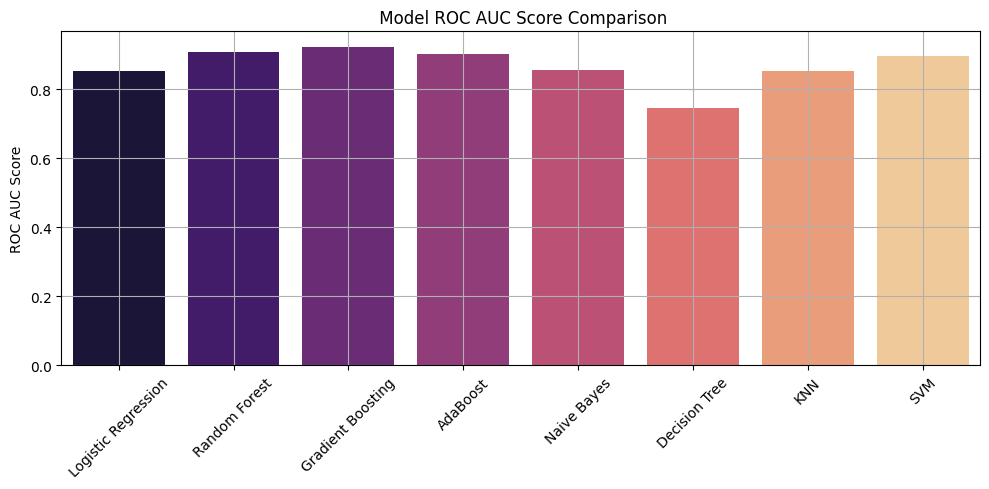

In [14]:
# Plot accuracies
plt.figure(figsize=(10, 5))
accuracy_scores = [results[m]['accuracy'] for m in models]
sns.barplot(x=list(models.keys()), y=accuracy_scores, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title(" Model Accuracy Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot ROC AUC Scores
plt.figure(figsize=(10, 5))
auc_scores = [results[m]['auc'] if results[m]['auc'] is not None else 0 for m in models]
sns.barplot(x=list(models.keys()), y=auc_scores, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("ROC AUC Score")
plt.title(" Model ROC AUC Score Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

# **💾 Step 13: Saving the Best Performing Model**

In [15]:
import joblib

# Determine best model by accuracy
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', models[best_model_name])
])
best_pipeline.fit(X_train, y_train)

# Save model and encoder
# Train label encoder ONLY on target column
label_encoder = LabelEncoder()
label_encoder.fit(data['income'])  # 'income' should be either '<=50K' or '>50K'

# Save it correctly
joblib.dump(label_encoder, "label_encoder.pkl")

joblib.dump(best_pipeline, 'best_model.pkl')

print("✅ Saved correct label_encoder.pkl for income.")

✅ Saved correct label_encoder.pkl for income.


# **🖥️ Step 14: Building the Streamlit App Interface**

In [16]:
!pip install streamlit
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [17]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load the trained model (should include scaler + classifier)
model = joblib.load("best_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")  # Trained on 'income'

st.set_page_config(page_title="Employee Salary Classification", layout="wide")
st.title("💰 Employee Salary Classification")

st.markdown("""
Predicts whether an employee earns **>50K** or **≤50K** based on demographic and work-related features.
""")

# Sidebar input
st.sidebar.header("Input Employee Details")

# --- HARDCODED OPTIONS (from your LabelEncoder training) ---
workclass_options = {
    "Federal-gov": 0, "Local-gov": 1, "Others": 2, "Private": 3,
    "Self-emp-inc": 4, "Self-emp-not-inc": 5, "State-gov": 6
}

marital_status_options = {
    "Divorced": 0, "Married-spouse-absent": 1, "Married-civ-spouse": 2,
    "Never-married": 4, "Separated": 5, "Widowed": 6
}

occupation_options = {
    "Adm-clerical": 0, "Armed-Forces": 1, "Farming-fishing": 2, "Exec-managerial": 3,
    "Craft-repair": 4, "Handlers-cleaners": 5, "Machine-op-inspct": 6,
    "Prof-specialty": 6, "Other-service": 8, "Sales": 9, "Priv-house-serv": 10,
    "Protective-serv": 11, "Transport-moving": 12, "Tech-support": 13, "Others": 8
}

relationship_options = {
    "Husband": 0, "Wife": 1, "Other-relative": 2,
    "Not-in-family": 3, "Own-child": 4, "Unmarried": 5
}

race_options = {
    "Amer-Indian-Eskimo": 0, "Asian-Pac-Islander": 1,
    "Black": 2, "Other": 3, "White": 4
}

gender_options = {"Female": 0, "Male": 1}

native_country_options = {
    'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columbia': 3, 'Cuba': 4, 'Dominican-Republic': 5,
    'Ecuador': 6, 'El-Salvador': 7, 'England': 8, 'France': 9, 'Germany': 10, 'Greece': 11,
    'Guatemala': 12, 'Haiti': 13, 'Holand-Netherlands': 14, 'Honduras': 15, 'Hong': 16,
    'Hungary': 17, 'India': 18, 'Iran': 19, 'Ireland': 20, 'Italy': 21, 'Jamaica': 22,
    'Japan': 23, 'Laos': 24, 'Mexico': 25, 'Nicaragua': 26, 'Outlying-US(Guam-USVI-etc)': 27,
    'Peru': 28, 'Philippines': 29, 'Poland': 30, 'Portugal': 31, 'Puerto-Rico': 32,
    'Scotland': 33, 'South': 34, 'Taiwan': 35, 'Thailand': 36, 'Trinadad&Tobago': 37,
    'United-States': 38, 'Vietnam': 39, 'Yugoslavia': 40, 'Others': 41
}

# --- Form Inputs ---
age = st.sidebar.slider("Age", 17, 75, 30)
workclass = st.sidebar.selectbox("Workclass", list(workclass_options.keys()))
fnlwgt = st.sidebar.number_input("Final Weight (fnlwgt)", 10000, 1000000, 250000, step=1000)
education_num = st.sidebar.slider("Education Number", 5, 16, 10)
marital_status = st.sidebar.selectbox("Marital Status", list(marital_status_options.keys()))
occupation = st.sidebar.selectbox("Occupation", list(occupation_options.keys()))
relationship = st.sidebar.selectbox("Relationship", list(relationship_options.keys()))
race = st.sidebar.selectbox("Race", list(race_options.keys()))
gender = st.sidebar.radio("Gender", list(gender_options.keys()))
capital_gain = st.sidebar.number_input("Capital Gain", 0, 100000, 0)
capital_loss = st.sidebar.number_input("Capital Loss", 0, 10000, 0)
hours_per_week = st.sidebar.slider("Hours per week", 1, 99, 40)
native_country = st.sidebar.selectbox("Native Country", list(native_country_options.keys()))

# --- Build input DataFrame ---
input_data = pd.DataFrame([{
    'age': age,
    'workclass': workclass_options[workclass],
    'fnlwgt': fnlwgt,
    'educational-num': education_num,
    'marital-status': marital_status_options[marital_status],
    'occupation': occupation_options[occupation],
    'relationship': relationship_options[relationship],
    'race': race_options[race],
    'gender': gender_options[gender],
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': native_country_options[native_country]
}])

st.subheader("🔍 Input Summary")
st.dataframe(input_data)

# --- Predict ---
if st.button("Predict Salary Class"):
    prediction = model.predict(input_data)[0]
    pred_label = label_encoder.inverse_transform([prediction])[0]
    st.success(f"🎯 Predicted Income Class: **{pred_label}**")

# --- Batch Prediction ---
st.markdown("---")
st.markdown("### 📂 Batch Prediction (CSV)")

uploaded_file = st.file_uploader("Upload a CSV file with appropriate input features", type=["csv"])

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("🔎 Preview of uploaded data:")
    st.write(batch_data.head())

    predictions = model.predict(batch_data)
    batch_data['Predicted Income'] = label_encoder.inverse_transform(predictions)

    st.success("✅ Batch prediction completed!")
    st.write(batch_data.head())

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("⬇️ Download CSV", csv, "batch_predictions.csv", "text/csv")


Writing app.py


In [18]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared

# Run Streamlit in the background
!streamlit run app.py &> /content/logs.txt &

--2025-07-22 07:06:43--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64 [following]
--2025-07-22 07:06:44--  https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/37d2bad8-a2ed-4b93-8139-cbb15162d81d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-22T08%3A04%3A26Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-22T0

# **🚀 Final Web Application**

In [ ]:
# Tunnel port 8501 using cloudflared
!./cloudflared tunnel --url http://localhost:8501

2025-07-22T07:06:45Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-07-22T07:06:45Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-07-22T07:06:48Z INF +--------------------------------------------------------------------------------------------+
2025-07-22T07:06:48Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-07-22T07:06:48Z INF |  https://intake-ob-classical-waiver.trycloudflare.com 